In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reto 4: Regresión Lineal Simple

### 1. Objetivos:
    - Utilizar Regresión Lineal Simple para intentar hacer predicciones entre pares de variables en nuestro dataset

---
    
### 2. Desarrollo:

En este Reto vamos a ver qué tan buenas predicciones podemos realizar entre pares de variables de nuestro dataset 'wine_quality_red-clean.csv'. Nuestros intentos en este momento van a ser bastante básicos, puesto que el mundo de las predicciones es tan vasto y complejo, que no hay manera de aprender todos los pequeños detalles durante este curso. Pero de todas maneras, lo que harás en este momento es un gran avance hacia desarrollar la capacidad de aplicar estas herramientas en el mundo real.

Tu Reto consiste no solamente en realizar algunas Regresiones Lineales Simples, sino también en preparar un Notebook digno de ser presentado a tus compañeros y la experta. Ésta será la primera vez que hacemos algo así. No te sientas nervioso: ¡estás preparado!

Realiza los siguientes pasos:

1. Lee tu dataset y copia el código del Reto anterior a éste para tener disponible todo el trabajo que realizaste con valores atípicos.
2. Utiliza una gráfica de pares (pairplot) para graficar tus variables y asegurarte de que no se te escapó algún par de variables interesantes que no pudimos identificar con la matriz de correlaciones.
3. Elige 3 pares de variables que te parezcan más prometedores para realizar predicciones.
4. Si es necesario, realiza un poco más de limpieza en esos 3 pares.
5. Por cada par, elige tu variable independiente y dependiente.
6. Crea un modelo por cada par de variables y entrénalos.
7. Crea gráficas para cada par de variables donde podamos ver una gráfica de dispersión de todas las muestras y una gráfica lineal que represente cada modelo entrenado.
8. Obtén el coeficiente de determinación para cada una de tus regresiones.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from google.colab import userdata

In [ ]:
# 1. Leer el dataset
ruta = userdata.get('ruta')

df = pd.read_csv(ruta + 'wine_quality_red-clean.csv', index_col=0)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Figure size 1000x800 with 0 Axes>

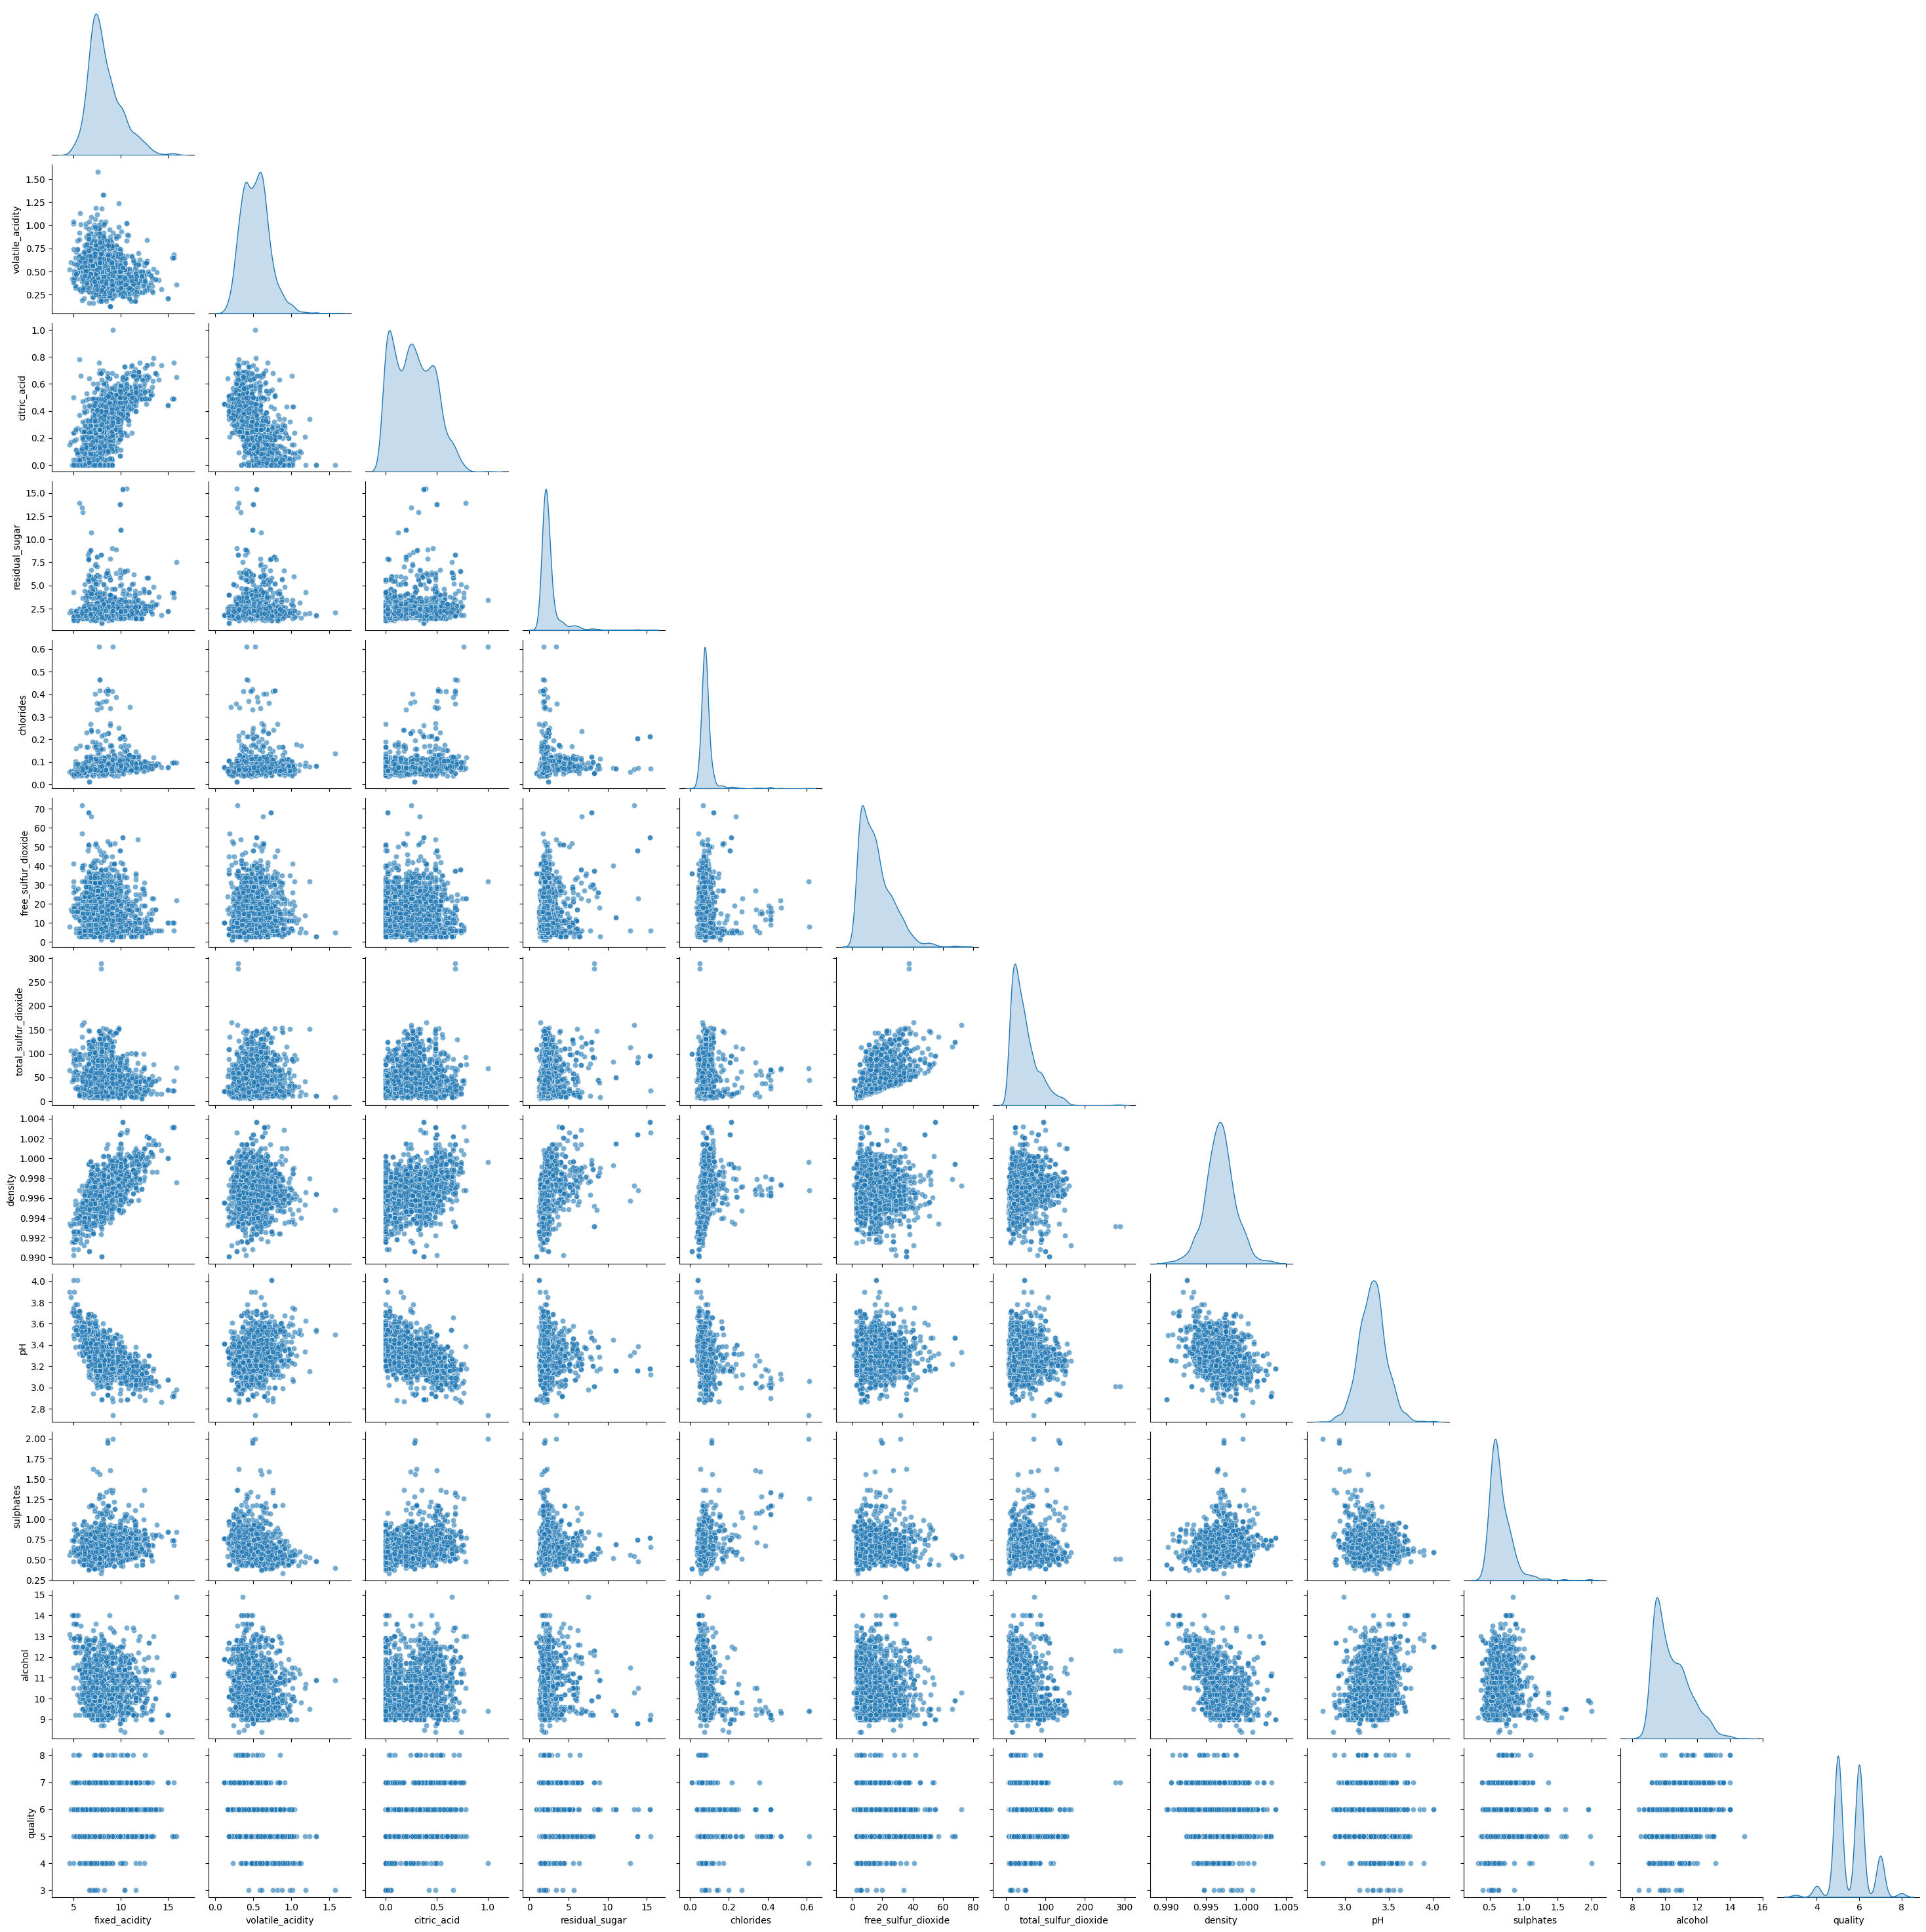

In [ ]:
# 2. Gráfica de pares (pairplot)

plt.figure(figsize=(10, 8))

sns.pairplot(
    df,
    diag_kind="kde",
    plot_kws={'alpha': 0.6},   # Transparencia de los puntos
    corner=True                # Mostrar solo la parte inferior de la matriz
)
# Mostrar el gráfico
plt.show()

In [ ]:
# 3. Elegir 3 pares de variables prometedores
# citric_acid - fixed_acidity
# density - fixed_acidity
# free_sulfur_dioxide - total_sulfur_dioxide

pairs = [
    ('citric_acid', 'fixed_acidity'),
    ('density', 'fixed_acidity'),
    ('free_sulfur_dioxide', 'total_sulfur_dioxide')
]

In [ ]:
def eliminar_valores_atipicos(df, columnas):
    # Calcular Q1, Q3 e IQR para las columnas especificadas
    Q1 = df[columnas].quantile(0.25)
    Q3 = df[columnas].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para considerar datos válidos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar el DataFrame sin valores atípicos
    filtro = (df[columnas] >= lower_bound) & (df[columnas] <= upper_bound)
    df_filtrado = df[filtro.all(axis=1)]  # Aplicar el filtro a todas las columnas

    return df_filtrado

In [ ]:
columnas_para_filtro = [
    ('citric_acid', 'fixed_acidity'),
    ('density', 'fixed_acidity')
]

for X_col, y_col in columnas_para_filtro:
  columnas_a_filtrar = [X_col, y_col]
  df_filtrado = eliminar_valores_atipicos(df, columnas_a_filtrar)

In [ ]:
filtro = df_filtrado['total_sulfur_dioxide'] < 200
df_filtrado = df_filtrado[filtro]

In [ ]:
filtro = df_filtrado['citric_acid'] < 8
df_filtrado = df_filtrado[filtro]

In [ ]:
# 6. Crear y entrenar modelos

models = {}
for X_col, y_col in pairs:
    X = df[[X_col]]
    y = df[y_col]

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Paso 3: Obtener los parámetros del modelo
    intercept = model.intercept_  # Intersección (b)
    coefficient = model.coef_[0]  # Pendiente (m)

    # Mostrar la ecuación de la recta
    print(f'La ecuación de la regresión es: Y = {coefficient:.2f} * X + {intercept:.2f}')

    # Guardar el modelo
    models[(X_col, y_col)] = model

La ecuación de la regresión es: Y = 5.90 * X + 6.72
La ecuación de la regresión es: Y = 613.70 * X + -603.40
La ecuación de la regresión es: Y = 2.13 * X + 12.78


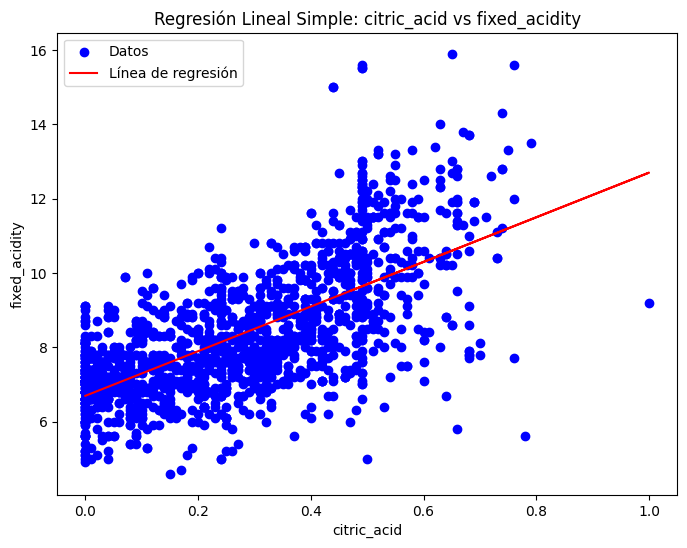

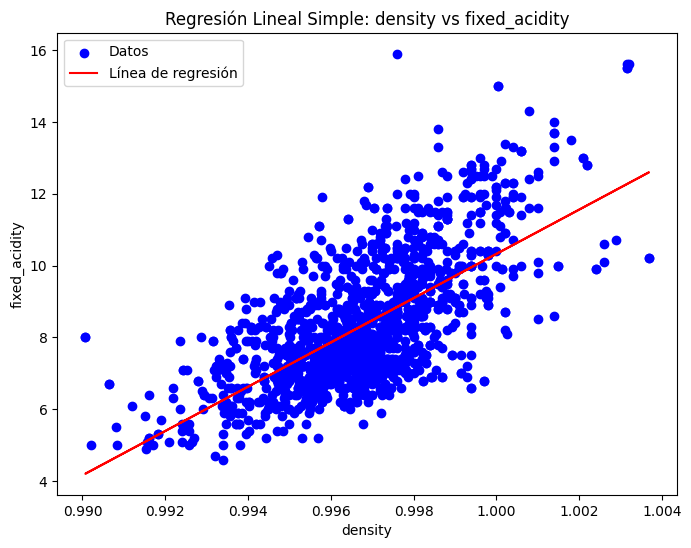

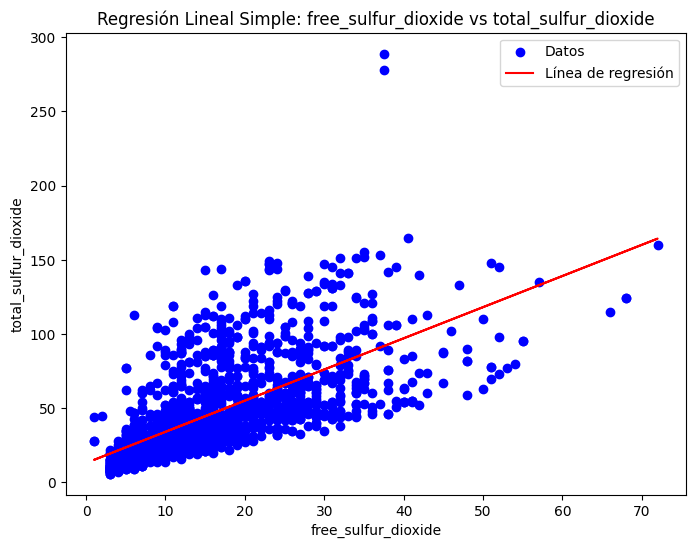

In [ ]:
# 7. Crear gráficas para cada par de variables
for X_col, y_col in pairs:
    model = models[(X_col, y_col)]
    X = df[[X_col]]
    y = df[y_col]

    plt.figure(figsize=(8, 6))

    # Gráfica de dispersión
    plt.scatter(X, y, color='blue', label='Datos')

    # Gráfica lineal del modelo
    y_pred = model.predict(X)
    plt.plot(X, y_pred, color='red', label='Línea de regresión')

    plt.xlabel(X_col)
    plt.ylabel(y_col)
    plt.title(f'Regresión Lineal Simple: {X_col} vs {y_col}')
    plt.legend()
    plt.show()

In [ ]:
# 8. Obtener el coeficiente de determinación (R^2) para cada regresión
for X_col, y_col in pairs:
    model = models[(X_col, y_col)]
    X = df[[X_col]]
    y = df[y_col]

    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)  # Ahora r2_score está definido
    print(f'Coeficiente de determinación (R^2) para {X_col} - {y_col}: {r2:.2f}')

Coeficiente de determinación (R^2) para citric_acid - fixed_acidity: 0.45
Coeficiente de determinación (R^2) para density - fixed_acidity: 0.45
Coeficiente de determinación (R^2) para free_sulfur_dioxide - total_sulfur_dioxide: 0.45
